<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Some-technical-details-about-fastai" data-toc-modified-id="Some-technical-details-about-fastai-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Some technical details about <code>fastai</code></a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load the data</a></span><ul class="toc-item"><li><span><a href="#Dataloaders" data-toc-modified-id="Dataloaders-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Dataloaders</a></span></li><li><span><a href="#Data-augmentation" data-toc-modified-id="Data-augmentation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data augmentation</a></span><ul class="toc-item"><li><span><a href="#Basic-transformations" data-toc-modified-id="Basic-transformations-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Basic transformations</a></span></li><li><span><a href="#Test-the-effect" data-toc-modified-id="Test-the-effect-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Test the effect</a></span></li><li><span><a href="#RandomErasing" data-toc-modified-id="RandomErasing-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>RandomErasing</a></span></li><li><span><a href="#MixUp-and-CutMix" data-toc-modified-id="MixUp-and-CutMix-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>MixUp and CutMix</a></span></li></ul></li></ul></li><li><span><a href="#Models" data-toc-modified-id="Models-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Models</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Training</a></span><ul class="toc-item"><li><span><a href="#Progressive-resizing" data-toc-modified-id="Progressive-resizing-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Progressive resizing</a></span><ul class="toc-item"><li><span><a href="#Size-64x64" data-toc-modified-id="Size-64x64-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Size 64x64</a></span></li><li><span><a href="#Size-128x128" data-toc-modified-id="Size-128x128-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Size 128x128</a></span></li></ul></li><li><span><a href="#Here-are-the-results-of-a-version-with-more-data-augmentation" data-toc-modified-id="Here-are-the-results-of-a-version-with-more-data-augmentation-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Here are the results of a version with more data augmentation</a></span></li></ul></li><li><span><a href="#Model-ensembling" data-toc-modified-id="Model-ensembling-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model ensembling</a></span></li><li><span><a href="#Evaluate" data-toc-modified-id="Evaluate-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Evaluate</a></span><ul class="toc-item"><li><span><a href="#TTA:-Test-time-augmentation" data-toc-modified-id="TTA:-Test-time-augmentation-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>TTA: Test-time augmentation</a></span></li><li><span><a href="#Confusion-matrix" data-toc-modified-id="Confusion-matrix-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Confusion matrix</a></span></li><li><span><a href="#Most-confused" data-toc-modified-id="Most-confused-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Most confused</a></span></li><li><span><a href="#Class-activation-maps" data-toc-modified-id="Class-activation-maps-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Class activation maps</a></span></li></ul></li><li><span><a href="#Your-turn!" data-toc-modified-id="Your-turn!-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Your turn!</a></span></li></ul></div>

A.S. Lundervold, v.211022

# Introduction

This notebooks continues where `1.0-asl-nnets_building_blocks_part1.ipynb` left off, showcasing some modern techniques from image classification. 

> **Note:** The notebook doesn't contain a lot of details. In the lecture, we'll explain each step in more detail.

For this example, we'll use the `fastai` deep learning library:

<img width=15% src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQmxUrCRPBipwj-orodQiF13-ulBr2BOZ0fhA&usqp=CAU">

## Some technical details about `fastai`

The fastai docs are quite good: https://docs.fast.ai/

You may also want to have a look at their paper _fastai: A Layered API for Deep Learning_ for details about the design of `fastai`: https://arxiv.org/abs/2002.04688

<img width=40% src="https://docs.fast.ai/images/layered.png">

# Setup

In [1]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory
# or on Kaggle, as that makes some difference for the code below.
# We'll do this in every notebook of the course.
try:
    import colab
    colab=True
except:
    colab=False

import os
kaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

In [2]:
import warnings

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
if (colab or kaggle):
    !pip3 install -U fastai

In [4]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, pandas as pd
from pathlib import Path

from fastai.vision.all import *

In [5]:
NB_DIR = Path.cwd()
if colab:
    from google.colab import drive
    drive.mount("/content/gdrive")
    DATADIR = Path("/content/gdrive/MyDrive/Colab Notebooks/data")
    DATADIR.mkdir(exist_ok=True)
if not colab:
    DATADIR = Path.home()/'data' # You can change this if you want to store data elsewhere
    DATADIR.mkdir(exist_ok=True)

# Load the data

In [6]:
path = untar_data(URLs.IMAGENETTE_160)

In [7]:
path.ls()

(#4) [Path('/home/ubuntu/.fastai/data/imagenette2-160/val'),Path('/home/ubuntu/.fastai/data/imagenette2-160/noisy_imagenette.csv'),Path('/home/ubuntu/.fastai/data/imagenette2-160/train'),Path('/home/ubuntu/.fastai/data/imagenette2-160/.DS_Store')]

In [8]:
fnames = get_image_files(path)

In [9]:
fnames

(#13394) [Path('/home/ubuntu/.fastai/data/imagenette2-160/val/n03445777/n03445777_5901.JPEG'),Path('/home/ubuntu/.fastai/data/imagenette2-160/val/n03445777/n03445777_5851.JPEG'),Path('/home/ubuntu/.fastai/data/imagenette2-160/val/n03445777/n03445777_3222.JPEG'),Path('/home/ubuntu/.fastai/data/imagenette2-160/val/n03445777/n03445777_6380.JPEG'),Path('/home/ubuntu/.fastai/data/imagenette2-160/val/n03445777/n03445777_532.JPEG'),Path('/home/ubuntu/.fastai/data/imagenette2-160/val/n03445777/n03445777_20061.JPEG'),Path('/home/ubuntu/.fastai/data/imagenette2-160/val/n03445777/n03445777_15880.JPEG'),Path('/home/ubuntu/.fastai/data/imagenette2-160/val/n03445777/n03445777_3722.JPEG'),Path('/home/ubuntu/.fastai/data/imagenette2-160/val/n03445777/n03445777_6721.JPEG'),Path('/home/ubuntu/.fastai/data/imagenette2-160/val/n03445777/n03445777_7552.JPEG')...]

In [10]:
lbl_dict = dict(
    n01440764='tench',
    n02102040='English springer',
    n02979186='cassette player',
    n03000684='chain saw',
    n03028079='church',
    n03394916='French horn',
    n03417042='garbage truck',
    n03425413='gas pump',
    n03445777='golf ball',
    n03888257='parachute'
)

In [11]:
def label_func(fname):
    return lbl_dict[parent_label(fname)]

## Dataloaders

In [12]:
def get_dataloaders(sz=128, bs=64, batch_tfms=None):
    dblock = DataBlock(
                blocks=(ImageBlock, CategoryBlock()),
                get_items=get_image_files,
                get_y=label_func,
                splitter=RandomSplitter(seed=42),
                item_tfms=Resize(sz),
                batch_tfms=batch_tfms)
    
    dls = dblock.dataloaders(path, bs=bs)
    return dls

In [13]:
dls = get_dataloaders()

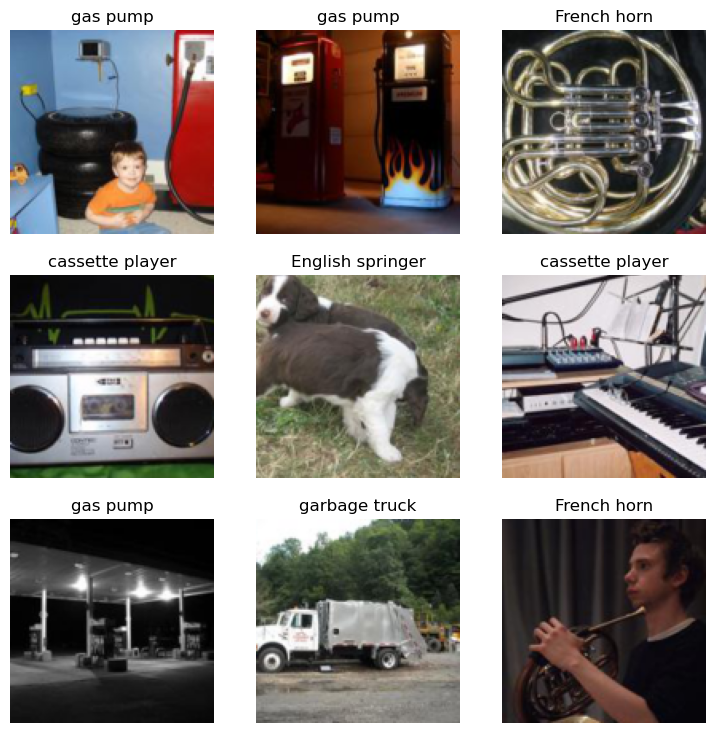

In [14]:
dls.show_batch()

## Data augmentation

### Basic transformations

In [15]:
batch_tfms=[Contrast(), Flip(), Brightness(), Rotate(max_deg=10), Saturation(),
            Zoom(max_zoom=1.1, min_zoom=1.0, p=0.5),
            Normalize.from_stats(*imagenet_stats)]

### Test the effect

In [16]:
dls = get_dataloaders(batch_tfms=batch_tfms)

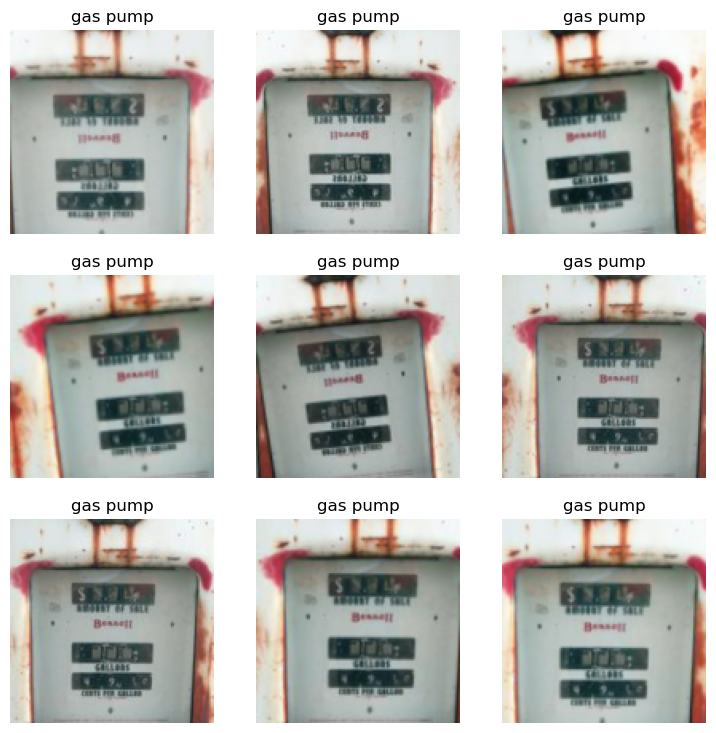

In [17]:
dls.show_batch(unique=True)

### RandomErasing

In [18]:
batch_tfms=[Contrast(), Flip(), Brightness(), Rotate(max_deg=10), Saturation(),
            Zoom(max_zoom=1.1, min_zoom=1.0, p=0.5),
            RandomErasing(), 
            Normalize.from_stats(*imagenet_stats)]

In [19]:
dls = get_dataloaders(batch_tfms=batch_tfms)

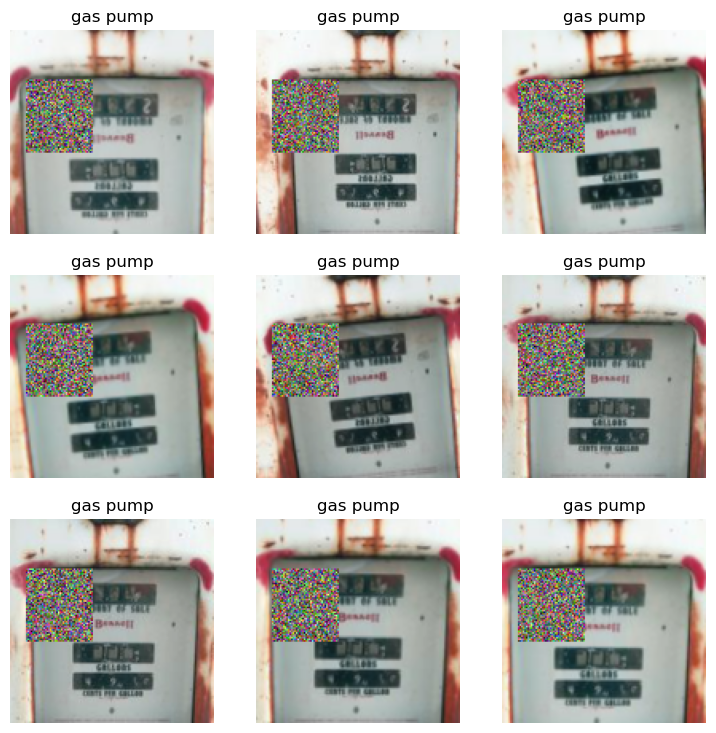

In [20]:
dls.show_batch(unique=True)

In [21]:
batch_tfms=[Contrast(), Flip(), Brightness(), Rotate(max_deg=10), Saturation(),
            Zoom(max_zoom=1.1, min_zoom=1.0, p=0.5),
            RandomErasing(), 
            RandomResizedCrop(128),
            Normalize.from_stats(*imagenet_stats)]

In [22]:
dls = get_dataloaders(batch_tfms=batch_tfms)

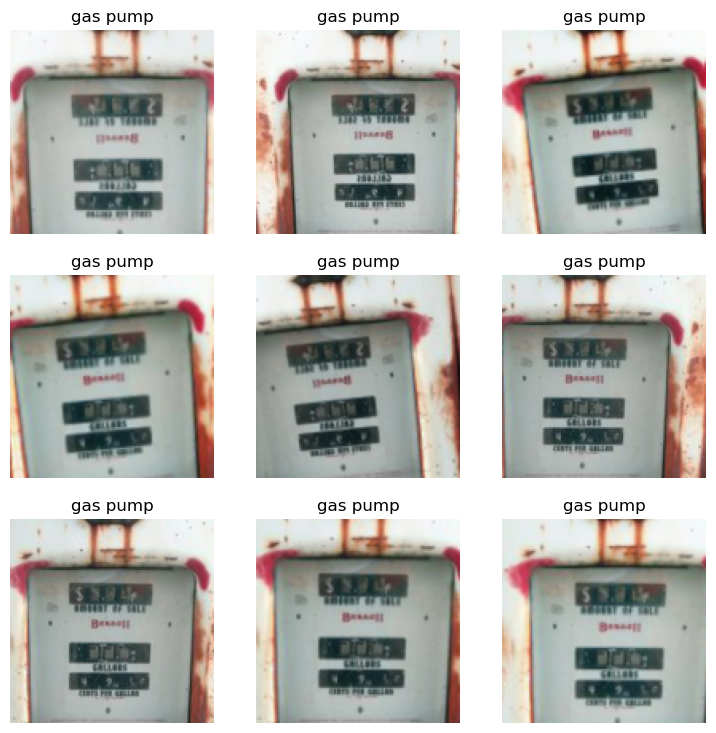

In [23]:
dls.show_batch(unique=True)

### MixUp and CutMix

<img width=80% src="assets/mixup.png">

<img width=80% src="assets/cutmix.png">

<img src="assets/mixup-cutmix.png">

<img src="assets/mixup2.png">

In [24]:
batch_tfms=[Contrast(), Flip(), Brightness(), Rotate(max_deg=10), Saturation(),
            Zoom(max_zoom=1.1, min_zoom=1.0, p=0.5),
            Normalize.from_stats(*imagenet_stats)]

In [25]:
dls = get_dataloaders(batch_tfms=batch_tfms)

In [26]:
mixup = MixUp(alpha=1.)
with Learner(dls, nn.Linear(3,4), loss_func=CrossEntropyLossFlat(), cbs=mixup) as learn_m:
    learn_m.epoch,learn_m.training = 0,True
    learn_m.dl = dls.train
    b = dls.one_batch()
    learn_m._split(b)
    learn_m('before_train')
    learn_m('before_batch')

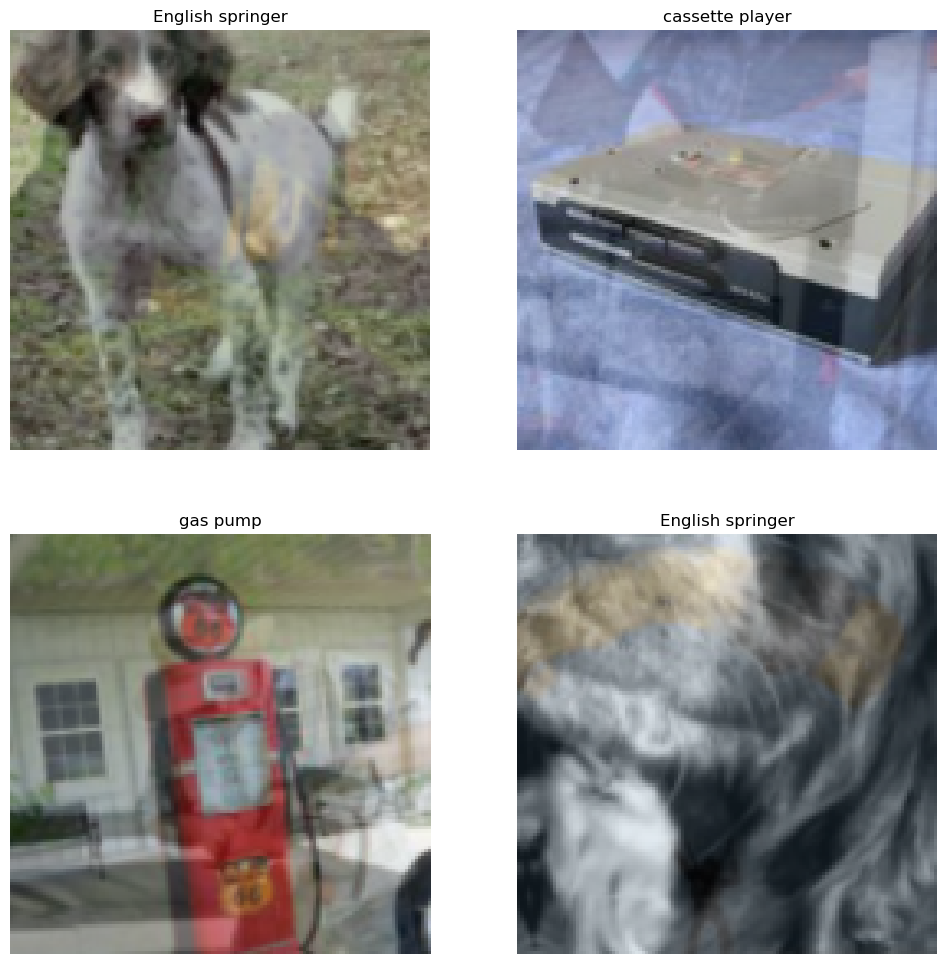

In [27]:
_,axs = plt.subplots(2,2, figsize=(12,12))
dls.show_batch(b=(mixup.x,mixup.y), ctxs=axs.flatten())

In [28]:
cutmix = CutMix(alpha=1.)
with Learner(dls, nn.Linear(3,4), loss_func=CrossEntropyLossFlat(), cbs=cutmix) as learn_c:
    learn_c.epoch,learn_c.training = 0,True
    learn_c.dl = dls.train
    b = dls.one_batch()
    learn_c._split(b)
    learn_c('before_train')
    learn_c('before_batch')

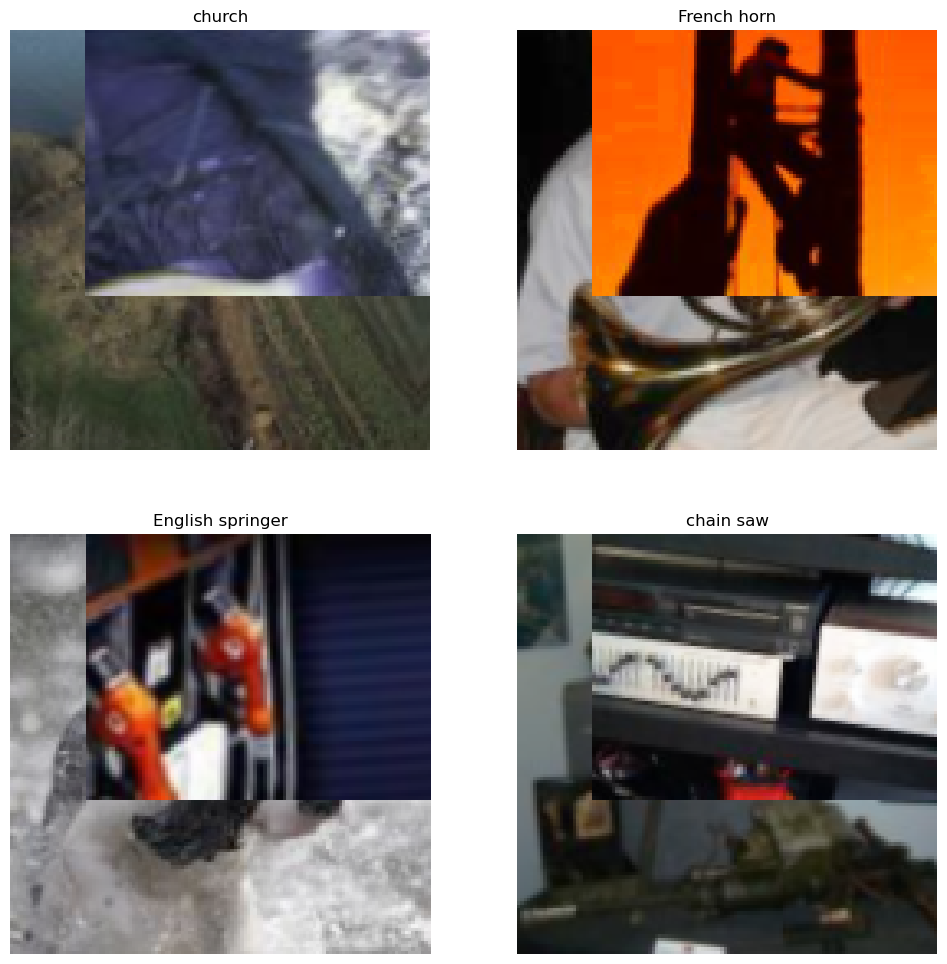

In [29]:
_,axs = plt.subplots(2,2, figsize=(12,12))
dls.show_batch(b=(cutmix.x,cutmix.y), ctxs=axs.flatten())

# Models

In [30]:
dls = get_dataloaders(sz=128, bs=64, batch_tfms=batch_tfms)

In [31]:
learn = Learner(
    dls, xresnet34(n_out=10),
    metrics=[accuracy, RocAuc(), F1Score(average='micro')], 
    path='.').to_fp16()

# Training

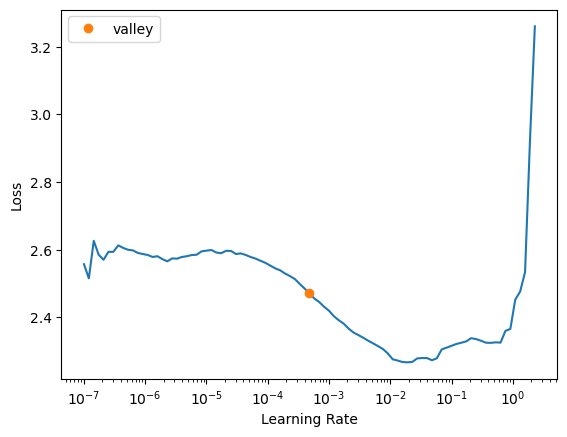

In [32]:
lr = learn.lr_find()

In [33]:
learn.fit_one_cycle(5, lr.valley)

## Progressive resizing

Note that as you continue training the model, the training loss will become quite a bit lower than the validation loss. Which is not in itself a problem, but there are tricks that can in a sense deal with this, and that can sometimes lead to better results.. Progressive resizing is one such trick.

By first training on a small version of the images and then progressively on larger and larger images one can often improve performance. In a sense you're pretraining the model on data that's very similar, yet different, to the target data set.

In [34]:
batch_tfms=[Contrast(), Flip(), Brightness(), Rotate(max_deg=10), Saturation(),
            Zoom(max_zoom=1.1, min_zoom=1.0, p=0.5),
            RandomErasing(), 
            RandomResizedCrop(128),
            Normalize.from_stats(*imagenet_stats)]

### Size 64x64

In [35]:
dls = get_dataloaders(sz=64, bs=128, batch_tfms=batch_tfms)

In [36]:
learn = Learner(
    dls, xresnet34(n_out=10),
    metrics=[accuracy, RocAuc(), F1Score(average='micro')], 
    path='.').to_fp16()

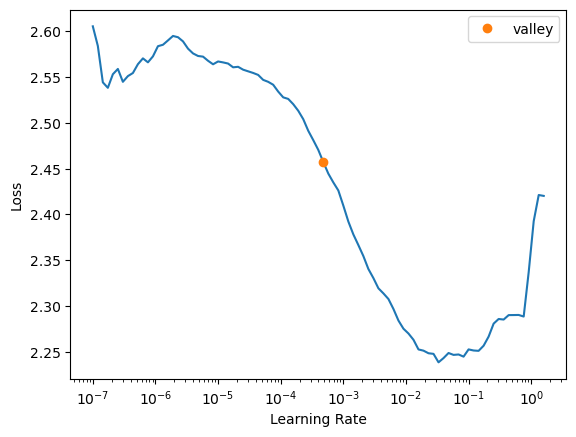

In [37]:
lr = learn.lr_find()

In [38]:
learn.fit_one_cycle(2, lr)

### Size 128x128

In [39]:
learn.dls = get_dataloaders(sz=128, bs=128, batch_tfms=batch_tfms)

In [40]:
learn.fit_one_cycle(8, lr)

## Here are the results of a version with more data augmentation

_Precomputed before the lecture as the training is time-consuming_

In [41]:
batch_tfms=[Contrast(), Flip(), Brightness(), Rotate(max_deg=10), Saturation(),
            Zoom(max_zoom=1.1, min_zoom=1.0, p=0.5),
            RandomErasing(), 
            RandomResizedCrop(128),
            Normalize.from_stats(*imagenet_stats)]

In [42]:
dls = get_dataloaders(sz=224, bs=128, batch_tfms=batch_tfms)

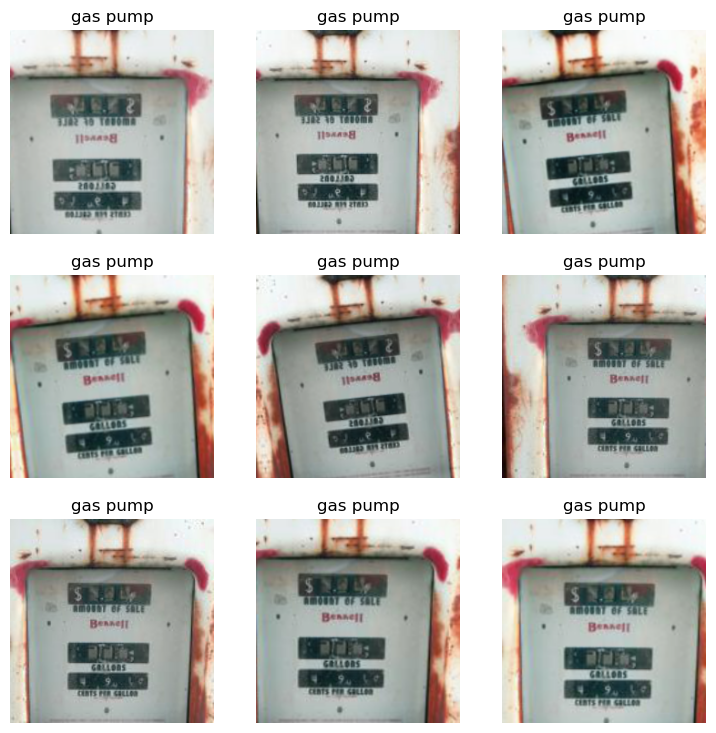

In [43]:
dls.show_batch(unique=True)

In [44]:
learn = Learner(
    dls, xresnet34(n_out=10),
    metrics=[accuracy, RocAuc(), F1Score(average='micro')], 
    path='.').to_fp16()

Here's the output of the training process (I ran it before the lecture):

<img src="assets/imagenette_mixup_training.png">

In [45]:
learn.fit_one_cycle(40, lr, cbs=[MixUp()])

In [46]:
#learn.save('mixup_model')

Path('models/mixup_model.pth')

In [37]:
learn.load('mixup_model')

# Model ensembling

If you have multiple models of similar performance, a simple trick to obtain an even better model is to construct an **ensemble**.


Ensembling techniques are related to the concept of the wisdom of the crowd. In many situations, a crowd of non-expert that combines their predictions outperform individual experts.

The idea is not new, of course. Here's Aristotle pointing this out back in 350 B.C.E:

> *For the many, of whom each individual is but an ordinary person, when they meet together may very likely be better than the few good, if regarded not individually but collectively, just as a feast to which many contribute is better than a dinner provided out of a single purse*<br>
&nbsp;&nbsp;&nbsp;&ndash; Aristotle, <a href="http://classics.mit.edu/Aristotle/politics.3.three.html">Politics Book III</a>

Ensembling is a general technique for combining machine learning models to make even more powerful models.

There are several variants of this: for example voting, bagging, boosting, stacking.


For classifiers, a simple strategy is to have each model in the ensemble vote on a class, and then use the majority class as the final output prediction. This is called hard voting.

Another frequently used simple strategy is to use the average of the models confidence scores, and then use a threshold to obtain the final predictions. In other words, a model that's more confidence than another model for a given instance contributes more to the prediction. This is called soft voting.

Let's try a soft-voting strategy using a few different models:

> Note: See `timm` for a bunch of possible models one can use: https://rwightman.github.io/pytorch-image-models/.

In [60]:
# We add the models and the number of epochs for 
# each model to two dictionaries (two instead of 
# one because of the slightly different syntax 
# when using xresnet models versus the others)

xresnet_models = {
    'xresnet34':        (xresnet34,12),
    'xresnet34_deep':   (xresnet34_deep,12),
    'xresnet50':        (xresnet50,18),
    'xresnet50_deep':   (xresnet50_deep,25)
}

other_models = {
    'rn34':             (resnet34,15),
    'squeezenet':       (squeezenet1_0,35)  
}

> The below training process takes a long time. Here are results computed ahead of time:

<img src="assets/imagenette-ensemble.png">

In [61]:
# Note: we train without MixUp to save some time

preds = {} # For storing the model predictions
acc = {}   # For storing the model accuracies

for name, m in xresnet_models.items():
    model = m[0]
    epochs = m[1]
    print(f"Training the model {name} for {epochs} epochs\n")
    
    learn_member = Learner(
        dls, model(n_out=10),
        metrics=accuracy).to_fp16()
    
    lr = learn_member.lr_find(show_plot=False)
    learn_member.fit_one_cycle(epochs, lr)
    y_preds_probs, y_true = learn_member.tta()
    preds[name] = y_preds_probs
    acc[name] = accuracy(y_preds_probs, y_true)
    print(f"Accuracy for model {name} with TTA is {acc[name]}")
    print('#'*40)
    
for name, m in other_models.items():
    model = m[0]
    epochs = m[1]
    print(f"Training the model {name} for {epochs} epochs\n")
    
    learn_member = vision_learner(
        dls, model, pretrained=False, n_out=10,
        metrics=accuracy).to_fp16()
    
    lr = learn_member.lr_find(show_plot=False)
    learn_member.fit_one_cycle(epochs, lr)
    y_preds_probs, y_true = learn_member.tta()
    preds[name] = y_preds_probs
    acc[name] = accuracy(y_preds_probs, y_true)
    print(f"Accuracy for model {name} with TTA is {acc[name]}")
    print('#'*40)
        

Training the model xresnet34 for 10 epochs



Accuracy for model xresnet34 with TTA is 0.799477219581604
########################################
Training the model xresnet34_deep for 12 epochs



Accuracy for model xresnet34_deep with TTA is 0.858476459980011
########################################
Training the model xresnet50 for 15 epochs



Accuracy for model xresnet50 with TTA is 0.7785661220550537
########################################
Training the model xresnet50_deep for 18 epochs



Accuracy for model xresnet50_deep with TTA is 0.807692289352417
########################################
Training the model rn34 for 15 epochs



Accuracy for model rn34 with TTA is 0.8177744746208191
########################################
Training the model squeezenet for 35 epochs



Accuracy for model squeezenet with TTA is 0.8177744746208191
########################################


We plot the model performances:

In [62]:
acc

{'xresnet34': TensorBase(0.7995),
 'xresnet34_deep': TensorBase(0.8585),
 'xresnet50': TensorBase(0.7786),
 'xresnet50_deep': TensorBase(0.8077),
 'rn34': TensorBase(0.8178),
 'squeezenet': TensorBase(0.8178)}

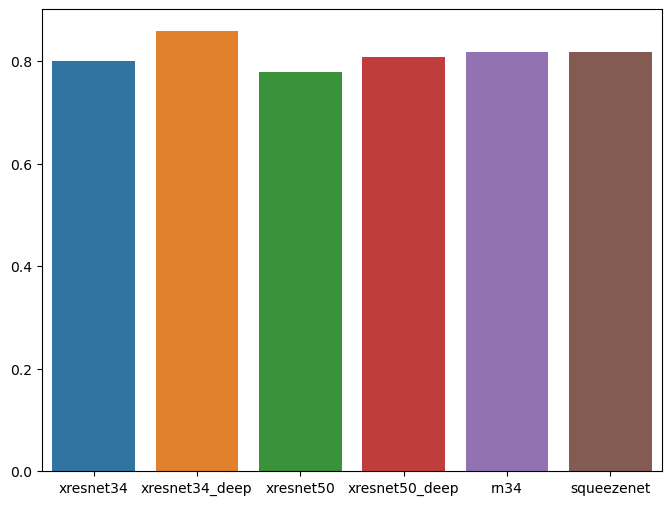

In [64]:
import seaborn as sns
plt.figure(figsize=(8,6))
vals = [float(a) for a in acc.values()]
sns.barplot(x=list(acc.keys()), y=vals)
plt.show()

Here are the predictions:

In [65]:
#preds

Adding models that perform significantly worse than the others is, in general, not a good idea:

In [74]:
del preds['xresnet50']
del acc['xresnet50']

In [79]:
del preds['xresnet34']
del acc['xresnet34']

In [80]:
# We add all the predictions from the different models together
added_probs = list(preds.values())[0]
i=0
for p in list(preds.values())[1:]:
    added_probs += p
    i+=1
# then divide by the number of predictions
ensembled_probs = added_probs/len(list(preds.values())[0])

In [81]:
acc['ensemble'] = accuracy(ensembled_probs, y_true)

In [82]:
print(acc)

{'xresnet34_deep': TensorBase(0.8585), 'xresnet50_deep': TensorBase(0.8077), 'rn34': TensorBase(0.8178), 'squeezenet': TensorBase(0.8178), 'ensemble': TensorBase(0.8562)}


# Evaluate

We evaluate the model that we trained earlier (the one with MixUp data augmentation):

In [47]:
learn = Learner(
    dls, xresnet34(n_out=10),
    metrics=[accuracy, RocAuc(), F1Score(average='micro')], 
    path='.').to_fp16()

In [48]:
learn.load('mixup_model')

## TTA: Test-time augmentation

Here's a trick that can potentially improve predictions on test data: make multiple predictions per test image using the data augmentation set up during training to make several somewhat independent predictions per image:

In [49]:
y_pred, y_test = learn.tta(n=10)

In [50]:
print(accuracy(y_pred, y_test).item())

0.8898431658744812


## Confusion matrix

In [51]:
interp = ClassificationInterpretation.from_learner(learn)

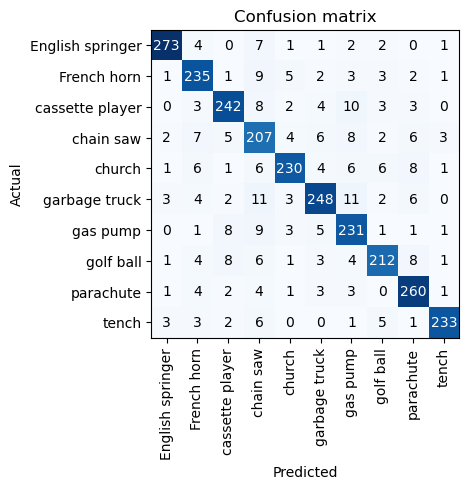

In [52]:
interp.plot_confusion_matrix()

## Most confused

In [55]:
interp.most_confused(min_val=6)

[('garbage truck', 'chain saw', 11),
 ('garbage truck', 'gas pump', 11),
 ('cassette player', 'gas pump', 10),
 ('French horn', 'chain saw', 9),
 ('gas pump', 'chain saw', 9),
 ('cassette player', 'chain saw', 8),
 ('chain saw', 'gas pump', 8),
 ('church', 'parachute', 8),
 ('gas pump', 'cassette player', 8),
 ('golf ball', 'cassette player', 8),
 ('golf ball', 'parachute', 8),
 ('English springer', 'chain saw', 7),
 ('chain saw', 'French horn', 7),
 ('chain saw', 'garbage truck', 6),
 ('chain saw', 'parachute', 6),
 ('church', 'French horn', 6),
 ('church', 'chain saw', 6),
 ('church', 'gas pump', 6),
 ('church', 'golf ball', 6),
 ('garbage truck', 'parachute', 6),
 ('golf ball', 'chain saw', 6),
 ('tench', 'chain saw', 6)]

## Class activation maps

By extracting the gradients belonging to each of the classes in the data set as they flow into the final convolutional layer in the image, one can produce a heatmap that indicates where in the image the model based its predictions on. 

<img src="assets/gradcam.png">

In [56]:
%pip install palettable fastai_amalgam matplotlib_venn

Note: you may need to restart the kernel to use updated packages.


In [57]:
# See the file `some_utils.py` to check what's imported here
# to compute the gradcam maps.
from some_utils import *

In [58]:
fnames

(#13394) [Path('/home/ubuntu/.fastai/data/imagenette2-160/val/n03445777/n03445777_5901.JPEG'),Path('/home/ubuntu/.fastai/data/imagenette2-160/val/n03445777/n03445777_5851.JPEG'),Path('/home/ubuntu/.fastai/data/imagenette2-160/val/n03445777/n03445777_3222.JPEG'),Path('/home/ubuntu/.fastai/data/imagenette2-160/val/n03445777/n03445777_6380.JPEG'),Path('/home/ubuntu/.fastai/data/imagenette2-160/val/n03445777/n03445777_532.JPEG'),Path('/home/ubuntu/.fastai/data/imagenette2-160/val/n03445777/n03445777_20061.JPEG'),Path('/home/ubuntu/.fastai/data/imagenette2-160/val/n03445777/n03445777_15880.JPEG'),Path('/home/ubuntu/.fastai/data/imagenette2-160/val/n03445777/n03445777_3722.JPEG'),Path('/home/ubuntu/.fastai/data/imagenette2-160/val/n03445777/n03445777_6721.JPEG'),Path('/home/ubuntu/.fastai/data/imagenette2-160/val/n03445777/n03445777_7552.JPEG')...]

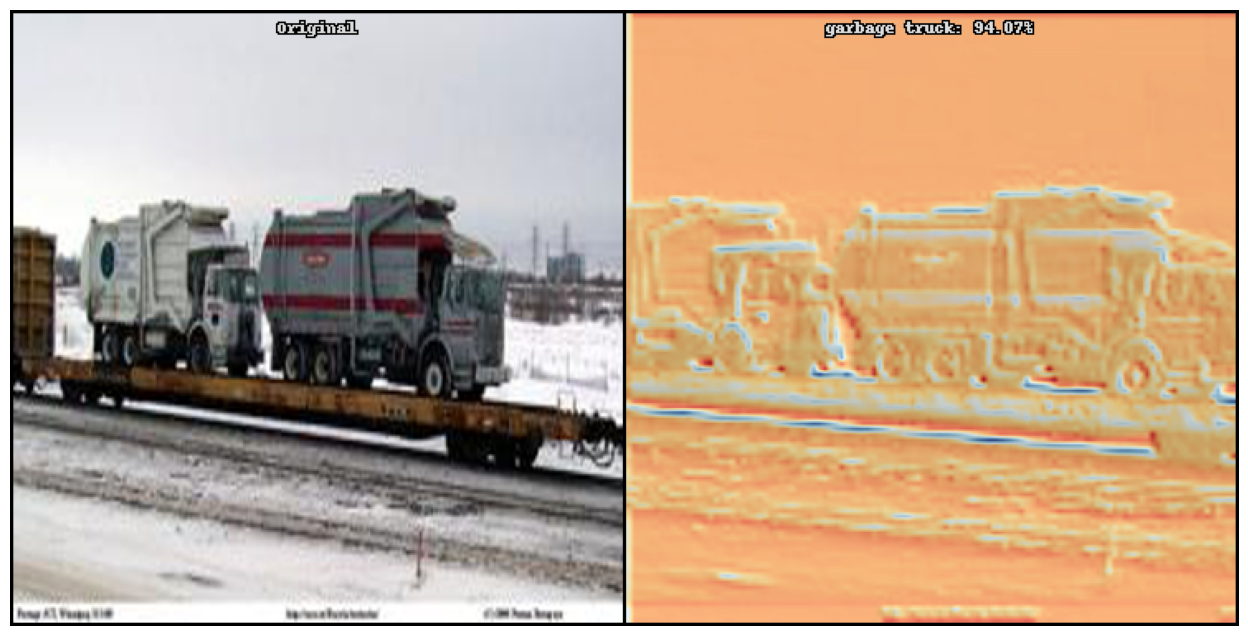

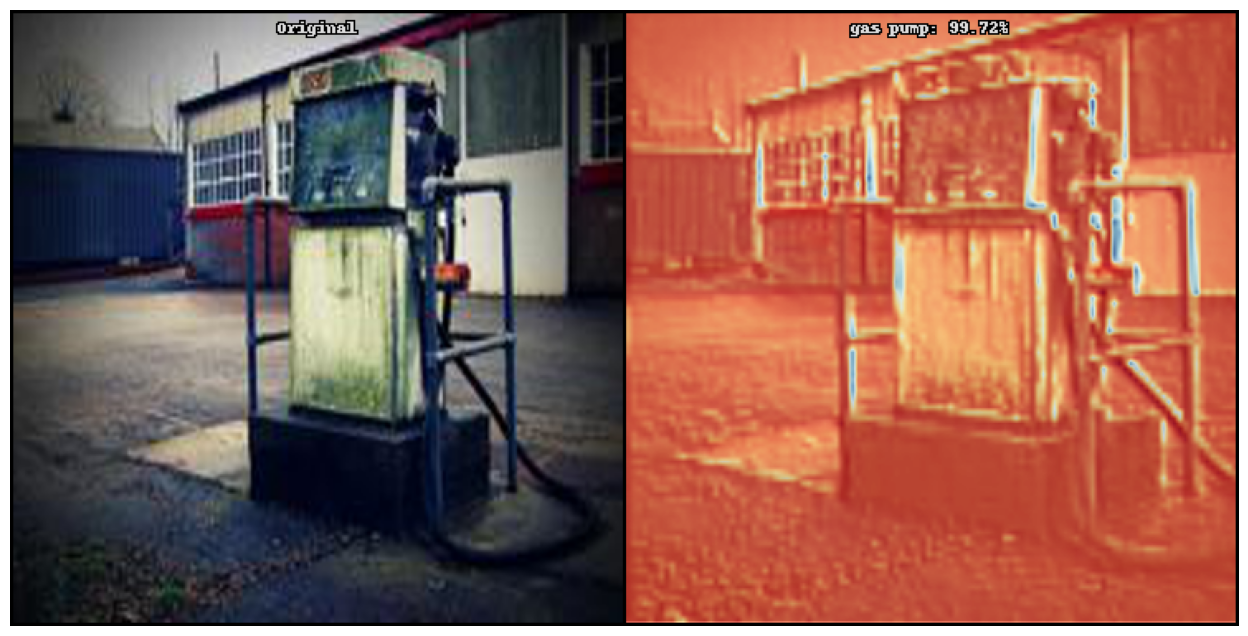

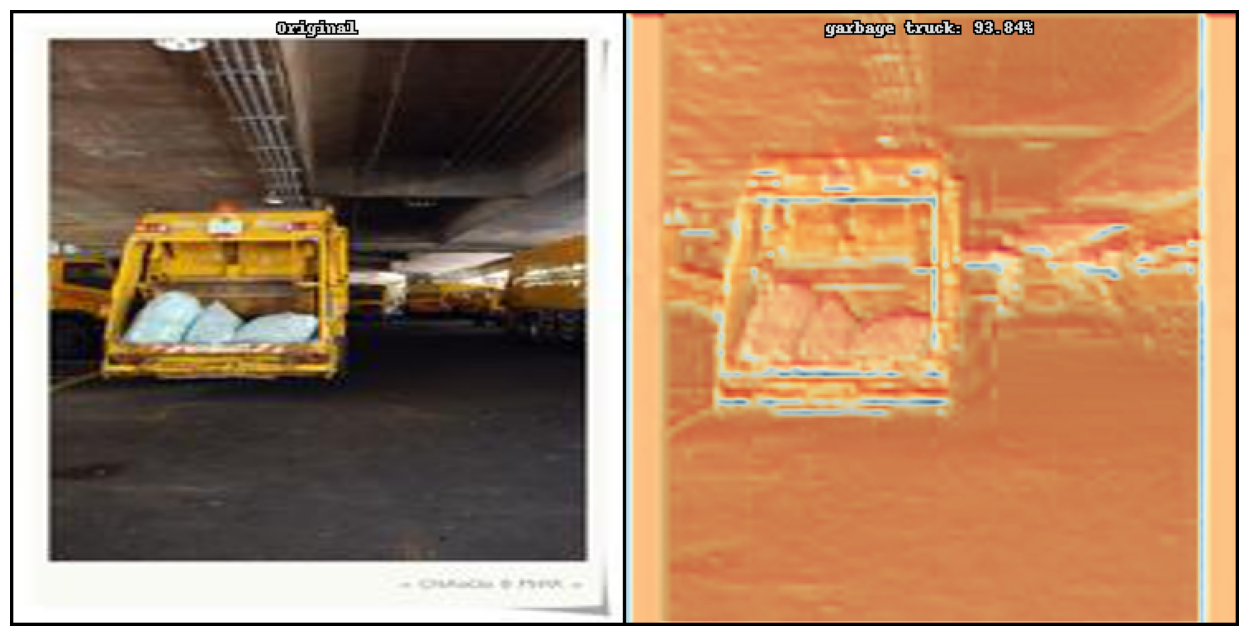

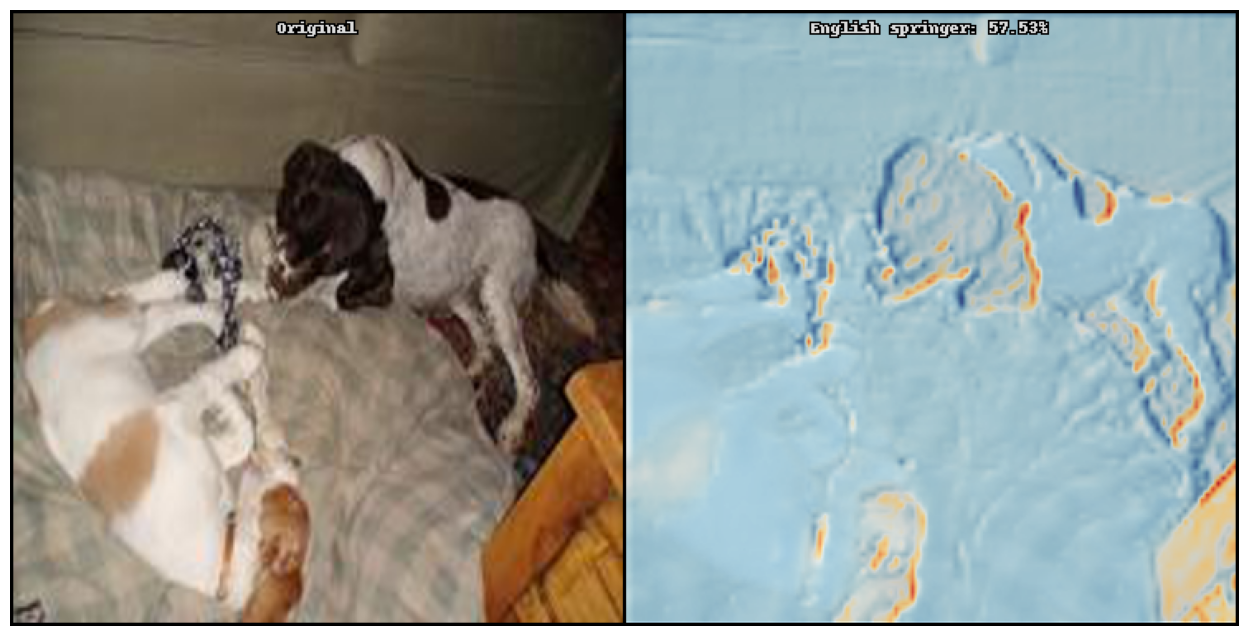

In [59]:
for img_fn in random.choices(fnames, k=4):
    gcam = gradcam(learn, img_fn, show_original=True, alpha=0.8)
    f = plt.figure(figsize=(16,8))
    plt.imshow(gcam)
    plt.axis('off')
    plt.show()

# Your turn!

Try to repeat the above story for the CIFAR-10 data set. How accurate a model are you able to construct?